# <b>CIFAR 10 USING CONVOLUTIONAL NEURAL NETWORK

<b>ABOUT CIFAR 10 DATA:</b>

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

<img src="https://lh3.googleusercontent.com/proxy/fOPHnJsbYl1QHP-NyhV4vAMGYbukpAVR_7bU-7TPwQnO5HsEjg7c_e43jjq3zYqSoka8aYRGXTASwJTH1bcy-kAHufIfzIP4EsMb9NDS4PIjkAW-Y4VcshwB4Tb-c3CgNwsjFimlozM1yhl1YQ" alt="Paris" class="center">

<b> Airplane-0, Automobile-1, Bird-2, Cat-3, Deer-4, Dog-5, Frog-6, Horse-7, Ship-8, Truck-9

<b>STEPS INVOLVED:</b>

1. Import the Libraries
2. Loading the Data
3. Split the Training data into Train and Validation
4. Define the Number of Classes
5. Plot Some of the Training Data
6. Preprocess the Data
7. Model Architecture Building
8. Display Model Summary
9. Compile, Create Checkpoint, and Run the Model
10. Plot Graph between Training loss and Validation Loss
11. Plot Graph between Training Accuracy and Validation Accuracy
12. Load the Saved Model
13. Evaluate the Test Data on Loaded Model
14. Make prediction and plot Confusion Matrix on Test Data
15. Plot Some of the Testing Data with Predicted Value
16. Mount the Drive and Load New Test Data
17. Make prediction and plot Confusion Matrix on New Test Data
18. Plot New Test Data with Predicted Value

<b> 1. IMPORT THE LIBRARIES

In [58]:
from keras.models import Model, Sequential
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.utils import np_utils
from keras.utils import to_categorical
from keras import optimizers
from keras.layers import Input, Conv1D, Conv2D,BatchNormalization, MaxPooling1D,MaxPooling2D, LSTM, Dense, Activation, Layer,Reshape
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.model_selection import train_test_split
import numpy as np
from keras.datasets import cifar10
from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt
import os
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


<b>2. LOADING THE DATA

In [2]:
# Loading dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
print( 'X_train shape: ',X_train.shape)
print( 'X_test shape: ',X_test.shape)
print( 'Y_train shape: ',Y_train.shape)
print( 'Y_test shape: ',Y_test.shape)

X_train shape:  (50000, 32, 32, 3)
X_test shape:  (10000, 32, 32, 3)
Y_train shape:  (50000, 1)
Y_test shape:  (10000, 1)


<B>3. SPLIT THE TRAINING DATA INTO TRAIN AND VALIDATION

In [4]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train,test_size=0.2)

In [5]:
print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)
print('X_val shape: ',X_val.shape)
print('Y_train shape: ',Y_train.shape)
print('Y_test shape: ',Y_test.shape)
print('Y_val shape: ',Y_val.shape)

X_train shape:  (40000, 32, 32, 3)
X_test shape:  (10000, 32, 32, 3)
X_val shape:  (10000, 32, 32, 3)
Y_train shape:  (40000, 1)
Y_test shape:  (10000, 1)
Y_val shape:  (10000, 1)


<b>4. DEFINE THE NUMBER OF CLASSES

In [6]:
num_classes = len(np.unique(Y_train))
print('Number of classes in Data: ',num_classes)

Number of classes in Data:  10


<b>5. PLOT SOME OF THE TRAINING DATA

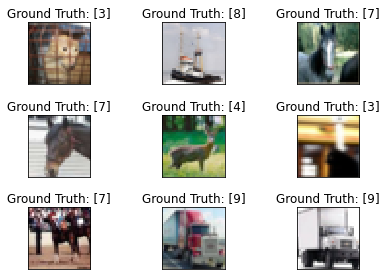

In [46]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(Y_train[i]))
  plt.xticks([])
  plt.yticks([])
  plt.tight_layout()

<b> 6. PREPROCESS THE DATA

In [8]:
#3)Preprocessing the data
x_train = X_train.astype('float32')/255
x_test = X_test.astype('float32')/255
x_val = X_val.astype('float32')/255
# convert class labels to binary class labels
y_train = np_utils.to_categorical(Y_train, num_classes)
y_test = np_utils.to_categorical(Y_test, num_classes)
y_val = np_utils.to_categorical(Y_val, num_classes)

<b>7. MODEL ARCHITECTURE BUILDING

In [9]:
#6) Model Architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

<b>8. DISPLAY MODEL SUMMARY

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

<b> 9. COMPLIE, CREATE CHECKPOINT AND RUN THE MODEL

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model_save = ModelCheckpoint('cifar_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')

In [16]:
history=model.fit(x_train, y_train, 
                       batch_size=128, epochs=50, 
                       validation_data = (x_val, y_val), 
                       verbose=1, callbacks=[model_save])

Epoch 1/50
313/313 [==============================] - 180s 577ms/step - loss: 1.2455 - accuracy: 0.5547 - val_loss: 1.0514 - val_accuracy: 0.6302
Epoch 2/50
313/313 [==============================] - 183s 586ms/step - loss: 1.0642 - accuracy: 0.6239 - val_loss: 0.9895 - val_accuracy: 0.6536
Epoch 3/50
313/313 [==============================] - 182s 581ms/step - loss: 0.9579 - accuracy: 0.6622 - val_loss: 0.8679 - val_accuracy: 0.6947
Epoch 4/50
313/313 [==============================] - 184s 588ms/step - loss: 0.8782 - accuracy: 0.6915 - val_loss: 0.8105 - val_accuracy: 0.7104
Epoch 5/50
313/313 [==============================] - 185s 592ms/step - loss: 0.8266 - accuracy: 0.7102 - val_loss: 0.7912 - val_accuracy: 0.7198
Epoch 6/50
313/313 [==============================] - 185s 590ms/step - loss: 0.7676 - accuracy: 0.7290 - val_loss: 0.7346 - val_accuracy: 0.7433
Epoch 7/50
313/313 [==============================] - 192s 612ms/step - loss: 0.7323 - accuracy: 0.7413 - val_loss: 0.7098 -

<b> 10. PLOT GRAPH BETWEEN TRAINING LOSS VS VALIDATION LOSS

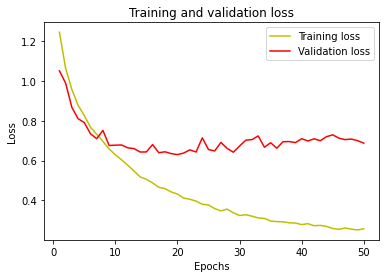

In [19]:
# 7)Training the model with graph on loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<b> 11. PLOT GRAPH BETWEEN TRAINING ACCURACY VS VALIDATION ACCURACY


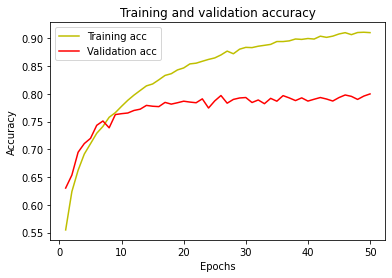

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<b> 12. LOAD THE SAVED MODEL

In [59]:
loaded_model=load_model('cifar_model.h5')

<b> 13. EVALUATE THE TEST DATA ON LOADED MODEL

In [60]:
#8) Testing the model
test_loss, test_acc = loaded_model.evaluate(x_test, y_test)
test_acc

313/313 [==============================] - 14s 44ms/step - loss: 0.7135 - accuracy: 0.7953


0.7953000068664551

<b>14. MAKE PREDICTION AND PLOT CONFUSION MATRIX ON TEST DATA

In [61]:
y_pred = loaded_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

Accuracy = 79.53%


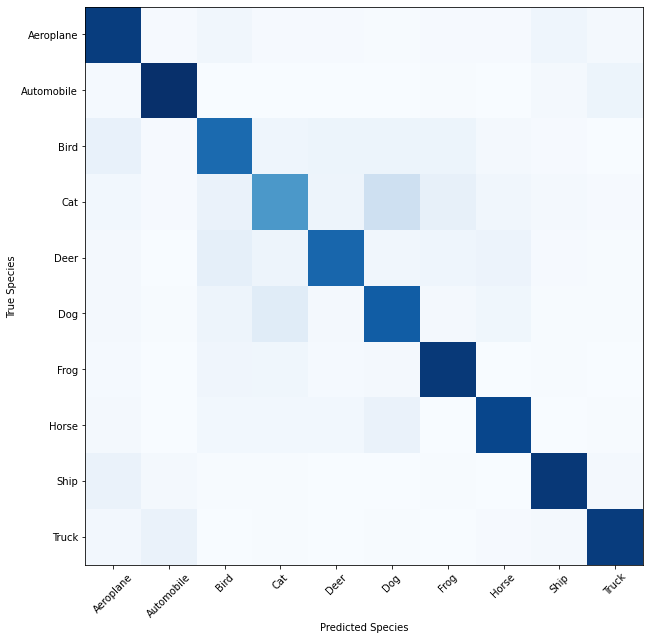

array([[863,  10,  30,   9,   9,   4,   8,   9,  42,  16],
       [ 12, 911,   3,   3,   0,   0,   7,   1,  16,  47],
       [ 65,   8, 707,  41,  49,  49,  49,  21,  10,   1],
       [ 27,  10,  58, 544,  45, 186,  73,  32,  15,  10],
       [ 15,   3,  79,  45, 720,  32,  40,  53,   9,   4],
       [ 15,   5,  45, 105,  18, 752,  17,  34,   5,   4],
       [ 11,   2,  38,  33,  13,  16, 878,   2,   5,   2],
       [ 18,   3,  26,  28,  27,  57,   1, 831,   3,   6],
       [ 60,  19,   5,   7,   3,   3,   5,   1, 880,  17],
       [ 24,  60,   3,   5,   3,   6,   3,   8,  21, 867]])

In [62]:
k=accuracy_score(Y_test, y_pred)
print('Accuracy = '+str(k*100) +'%')
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(10,20))
plt.imshow(cm, cmap='Blues')
target=np.array(['Aeroplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck'])
tick_marks = np.arange(len(target))
plt.xticks(tick_marks, target, rotation=45)
plt.yticks(tick_marks, target)
plt.xlabel("Predicted Species")
plt.ylabel("True Species")
plt.show()
cm

<b>15. PLOT SOME OF THE TESTING DATA WITH PREDICTED VALUE

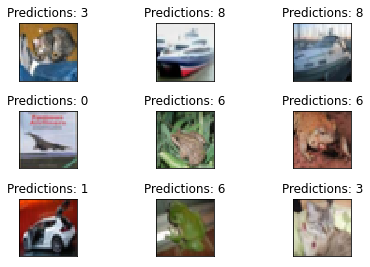

In [52]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_test[i], cmap='gray', interpolation='none')
  plt.title("Predictions: {}".format(y_pred[i]))
  plt.xticks([])
  plt.yticks([])

<b> 16. MOUNT THE DRIVE AND LOAD NEW TEST DATA

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [63]:
y_test_new=[]
y_label=[]
for i in os.listdir('/content/drive/My Drive/test_images'):
    for j in os.listdir('/content/drive/My Drive/test_images/'+i):
        image= Image.open('/content/drive/My Drive/test_images/'+i+'/'+j)
        newsize = (32, 32)
        image1=image.resize(newsize)
        data = asarray(image1) 
        y_test_new.append(data)
        y_label.append(int(i))

In [64]:
y_test_new=np.array(y_test_new)
y_label=np.array(y_label)

In [65]:
print('New Test Data Shape: ',y_test_new.shape)

New Test Data Shape:  (10, 32, 32, 3)


In [66]:
print('Label of New Data: ',y_label)

Label of New Data:  [6 8 2 4 1 9 7 0 3 5]


<b>17. MAKE PREDICTION AND PLOT CONFUSION MATRIX ON NEW TEST DATA

In [68]:
y_pred_new = loaded_model.predict(y_test_new)
y_pred1 = np.argmax(y_pred_new, axis=1)

Accuracy = 60.0%


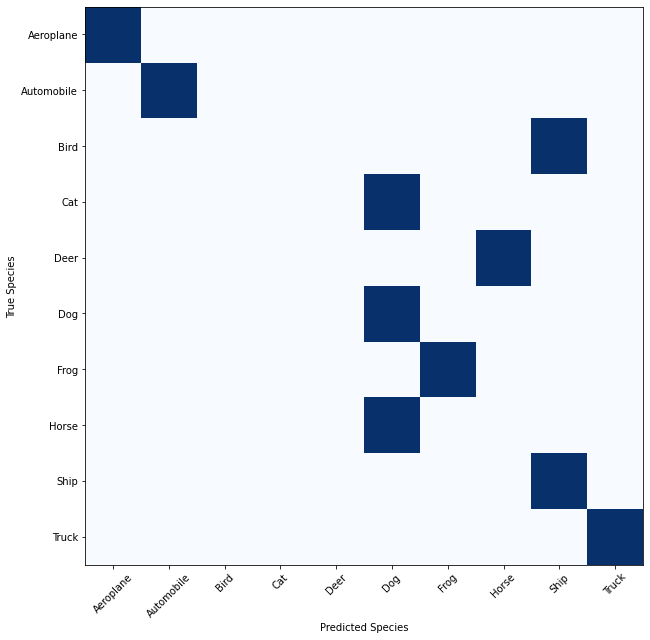

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [69]:
k=accuracy_score(y_label, y_pred1)
print('Accuracy = '+str(k*100) +'%')
cm = confusion_matrix(y_l, y_pred2)
plt.figure(figsize=(10,20))
plt.imshow(cm, cmap='Blues')
target=np.array(['Aeroplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck'])
tick_marks = np.arange(len(target))
plt.xticks(tick_marks, target, rotation=45)
plt.yticks(tick_marks, target)
plt.xlabel("Predicted Species")
plt.ylabel("True Species")
plt.show()
cm

<b>18. PLOT THE NEW TESTING DATA WITH PREDICTED VALUE

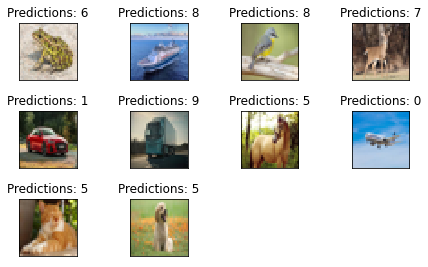

In [70]:
fig = plt.figure()
for i in range(10):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(y_test_new[i], cmap='gray', interpolation='none')
  plt.title("Predictions: {}".format(y_pred1[i]))
  plt.xticks([])
  plt.yticks([])